In [52]:
import numpy as np
from scipy import linalg
import sympy as sp
import matplotlib.pyplot as plt

In [53]:
lamda, mu, rho = sp.symbols('lamda mu rho')
A = sp.zeros(9, 9)
A[0, 3] = A[1, 4] = A[2, 5] = -1 / rho
A[3, 0] = -(lamda + 2 * mu)
A[4, 1] = A[5, 2] = -mu
A[6, 0] = A[8, 0] = -lamda

for eigval in A.eigenvals().items():
    print(eigval)

(-sqrt(lamda/rho + 2*mu/rho), 1)
(sqrt(lamda/rho + 2*mu/rho), 1)
(-sqrt(mu/rho), 2)
(sqrt(mu/rho), 2)
(0, 3)


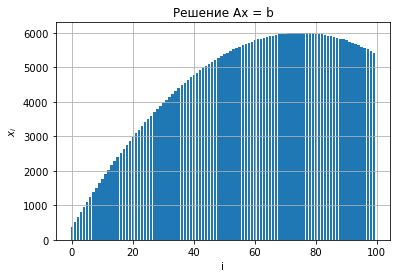

In [54]:
data = np.loadtxt('large.txt', skiprows=1)
N = len(data[0])
A, b = np.array_split(data, [N])
x = linalg.solve(A, b[0])

fig, ax = plt.subplots()
ax.bar(np.arange(N), x)
ax.set_xlabel('i')
ax.set_ylabel(r'$x_i$')
ax.set_title('Решение Ax = b')
ax.grid()
fig.savefig('episode-2.png', bbox_inches = 'tight')

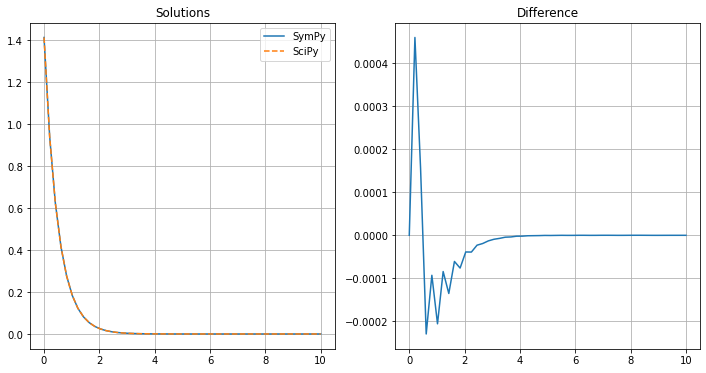

In [55]:
from scipy.integrate import solve_ivp

x = sp.symbols('x')
y = sp.Function('y')
eq = sp.Eq(y(x).diff(x), -2*y(x))
t_values = np.linspace(0, 10, 50)
sol_sympy = np.array([sp.dsolve(eq, y(x), ics={y(0): sp.sqrt(2)}).rhs.subs({x: t}) for t in t_values], dtype=float)

def diff(x, y):
    return -2*y

sol_scipy = solve_ivp(diff, [0, 10], [2**0.5], t_eval=t_values).y[0]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(t_values, sol_sympy, label='SymPy')
ax[0].plot(t_values, sol_scipy, label='SciPy',  linestyle='--')
ax[1].plot(t_values, sol_sympy - sol_scipy )
ax[0].legend()
ax[0].grid()
ax[1].grid()
ax[0].set_title('Solutions')
ax[1].set_title('Difference')

fig.savefig('episode-3.png', bbox_inches = 'tight')